In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from neuralhydrology.evaluation import metrics
import pickle
import sys

In [4]:
run_dir = Path('./runs/test_run_0801_210922')
output = run_dir / "test" / "model_epoch050" / "test_timeseries.png"

with open(run_dir / "test" / "model_epoch050" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)

results.keys()

# extract observations and simulations
DS = results['01022500']['1D']['xr']
qobs = DS['QObs(mm/d)_obs']
qsim = DS['QObs(mm/d)_sim']


NSE: 0.750
MSE: 1.232
RMSE: 1.110
KGE: 0.851
Alpha-NSE: 0.958
Beta-KGE: 1.065
Beta-NSE: 0.059
Pearson-r: 0.872
FHV: -4.941
FMS: -2.229
FLV: -217.409
Peak-Timing: 0.130
Peak-MAPE: 32.720


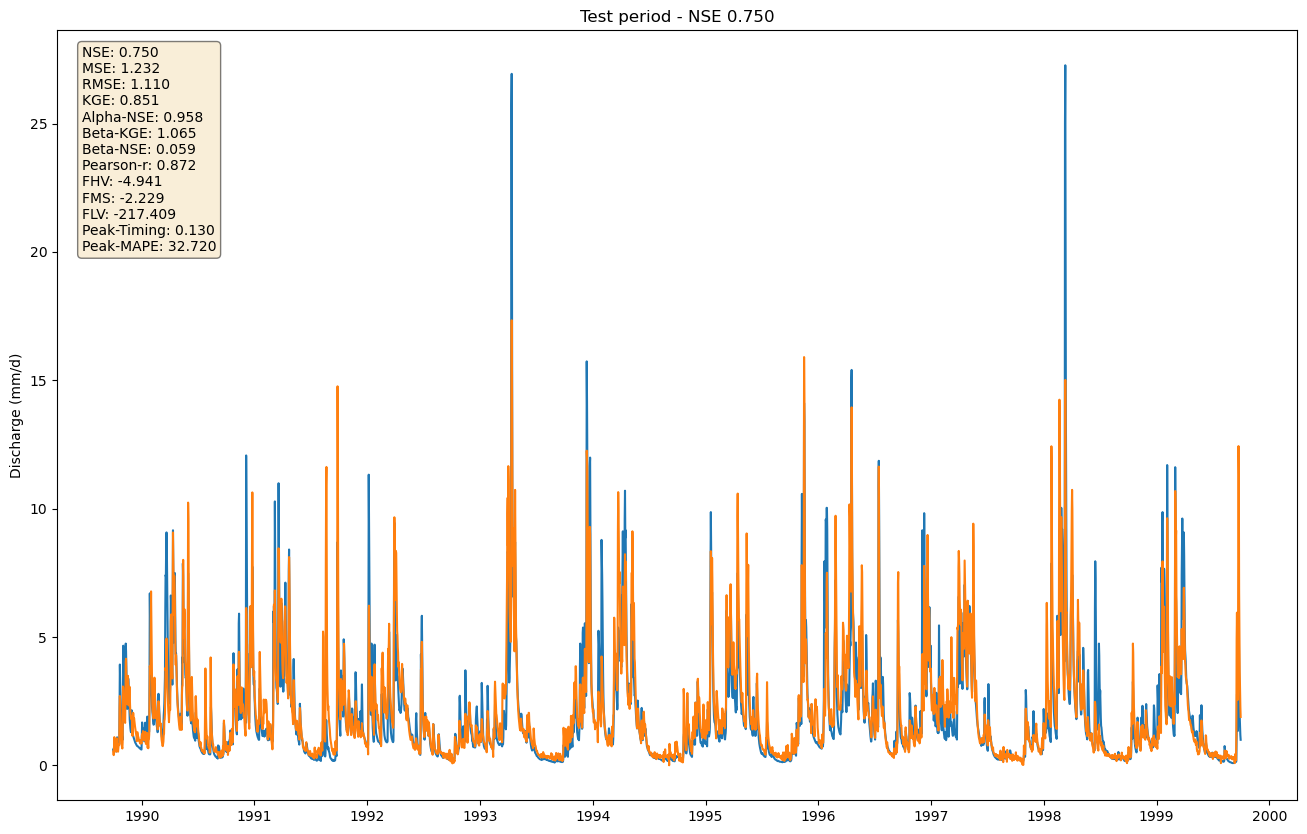

In [5]:

# Calculate metrics for annotation
metric_text = ""
values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    metric_text += f"{key}: {val:.3f}\n"
    print(f"{key}: {val:.3f}")

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (mm/d)")
ax.set_title(f"Test period - NSE {results['01022500']['1D']['NSE']:.3f}")
ax.text(0.02, 0.98, metric_text.strip(), transform=ax.transAxes,
        verticalalignment='top', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.savefig(output)



